# Using lapse probabilities and distributions in HSSM

Since v0.1.2, HSSM has added the ability to model outliers in the distribution with lapse probabilities and distributions. Let's see how it works.

In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt

import hssm

hssm.set_floatX("float32")

## Lapse probabilities and distributions are enabled by default.

From v0.1.2 on, lapse probabilities and distributions are enabled by default. If left unspecified, the probability for outliers will be a fixed value of 0.05 and the distribution will be specified as `Uniform(0, 10)`.

In [2]:
# Simulate some data

ddm_data = hssm.simulate_data(model="ddm", theta=[0.5, 1.5, 0.5, 0.1], size=1000)

ddm_data.head()

,rt,response
0,1.077991,1.0
1,0.559998,1.0
2,4.003900,1.0
3,1.225997,1.0
4,6.057751,1.0


In [3]:
import numpy as np

np.mean(ddm_data["response"] == 1.0)

0.822

In [4]:
# Build the simplest model specifying only data
# Note the model output

ddm_model_default = hssm.HSSM(
    data=ddm_data,
    # t=bmb.Prior("Uniform", lower=0.0, upper=3.0, initval=0.5),
    # a=bmb.Prior("HalfNormal", sigma=2.0),
    p_outlier=None,
    lapse=None,
)
ddm_model_default

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Likelihood: analytical
Observations: 1000

Parameters:

v:
    Prior: Uniform(lower: -10.0, upper: 10.0)
    Explicit bounds: None
a:
    Prior: HalfNormal(sigma: 2.0)
    Explicit bounds: None
z:
    Prior: Uniform(lower: 0.0, upper: 1.0)
    Explicit bounds: (0.0, 1.0)
t:
    Prior: Uniform(lower: 0.0, upper: 2.0, initval: 0.10000000149011612)
    Explicit bounds: None

In [ ]:
ddm_model_default.sample(
    cores=8, chains=8, tune=1000, draws=1000, discard_tuned_samples=False
)

Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
INFO:pymc.sampling.mcmc:Multiprocess sampling (8 chains in 8 jobs)
NUTS: [a, t, z, v]
INFO:pymc.sampling.mcmc:NUTS: [a, t, z, v]


In [ ]:
for seed in range(100, 1000):
    trace = ddm_model_default.sample(
        cores=1,
        chains=1,
        tune=1000,
        draws=1000,
        random_seed=seed,
        discard_tuned_samples=False,
    )
    print(seed)
    if np.any(trace.sample_stats.diverging.sel(chain=0)):
        break

Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
INFO:pymc.sampling.mcmc:Sequential sampling (1 chains in 1 job)
NUTS: [t, a, z, v]
INFO:pymc.sampling.mcmc:NUTS: [t, a, z, v]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 15 seconds.
INFO:pymc.sampling.mcmc:Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc.stats.convergence:Only one chain was sampled, this makes it impossible to run some convergence checks


100


Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
INFO:pymc.sampling.mcmc:Sequential sampling (1 chains in 1 job)
NUTS: [t, a, z, v]
INFO:pymc.sampling.mcmc:NUTS: [t, a, z, v]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 16 seconds.
INFO:pymc.sampling.mcmc:Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 16 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
INFO:pymc.stats.convergence:Only one chain was sampled, this makes it impossible to run some convergence checks


101


Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
INFO:pymc.sampling.mcmc:Sequential sampling (1 chains in 1 job)
NUTS: [t, a, z, v]
INFO:pymc.sampling.mcmc:NUTS: [t, a, z, v]


In [6]:
ddm_model_default.sample(
    cores=8,
    chains=8,
    tune=1000,
    draws=1000,
    discard_tuned_samples=False,
    sampler="nuts_numpyro",
)

Compiling...
Compilation time =  0:00:03.413664
Sampling...


/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/jax/_src/numpy/array_methods.py:796: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/pytensor/link/jax/dispatch/tensor_basic.py:177: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return jnp.array(x, dtype=op.dtype)


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time =  0:00:17.921235
Transforming variables...
Transformation time =  0:00:00.094718


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'v'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

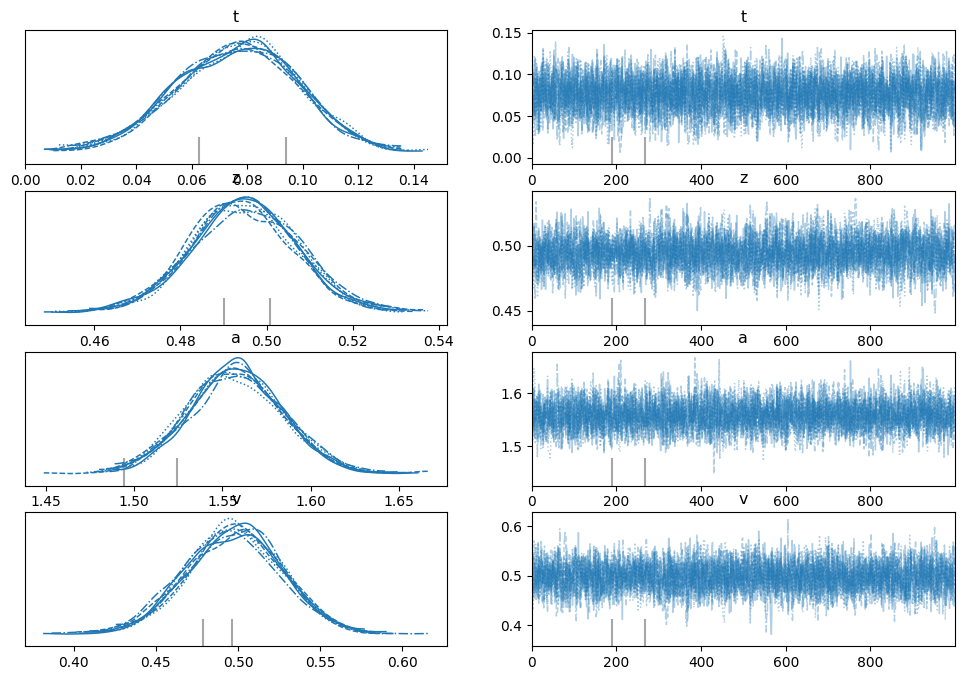

In [6]:
az.plot_trace(ddm_model_default.traces)

In [17]:
trace.warmup_sample_stats.diverging.sel(chain=0)

<xarray.DataArray 'diverging' (draw: 1000)>
array([ True,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [6]:
ddm_model_default.traces.sample_stats.diverging.sel(chain=0)

<xarray.DataArray 'diverging' (draw: 1000)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [7]:
ddm_model_default.traces.posterior.a.sel(chain=0)

<xarray.DataArray 'a' (draw: 1000)>
array([4.8746862, 4.8739834, 4.8740396, 4.874093 , 4.874093 , 4.874055 ,
       4.8738437, 4.8738437, 4.8739676, 4.8740826, 4.8741536, 4.8741536,
       4.8741536, 4.874132 , 4.8741994, 4.8740854, 4.874034 , 4.875422 ,
       4.8767366, 4.8765435, 4.8759465, 4.8757415, 4.876856 , 4.877085 ,
       4.87722  , 4.8774185, 4.8782644, 4.8808823, 4.8806887, 4.880981 ,
       4.8814006, 4.8813233, 4.8813076, 4.8813076, 4.8813796, 4.881188 ,
       4.8819113, 4.8819017, 4.882118 , 4.882118 , 4.8810596, 4.8804812,
       4.878195 , 4.87847  , 4.8784657, 4.8787203, 4.878967 , 4.879078 ,
       4.8783393, 4.8788333, 4.878757 , 4.8785934, 4.87854  , 4.877809 ,
       4.8780766, 4.8821936, 4.8862176, 4.885953 , 4.8842573, 4.8826714,
       4.8826494, 4.884537 , 4.883449 , 4.8846316, 4.884149 , 4.8861475,
       4.88484  , 4.885689 , 4.8867188, 4.8864164, 4.885087 , 4.883433 ,
       4.883862 , 4.884963 , 4.8822694, 4.881935 , 4.8782015, 4.878246 ,
       4.8789496, 4.8789005, 4.8794184, 4.8773084, 4.8782516, 4.8797245,
       4.879934 , 4.8803306, 4.8818507, 4.8808913, 4.881113 , 4.8811603,
       4.8812685, 4.881217 , 4.880339 , 4.8794637, 4.879013 , 4.878521 ,
       4.8787165, 4.878453 , 4.8791695, 4.879592 , 4.880574 , 4.8806367,
       4.881876 , 4.882858 , 4.8846416, 4.8845477, 4.8842382, 4.884655 ,
       4.8846936, 4.8852262, 4.8866534, 4.8870974, 4.8856277, 4.884924 ,
       4.884882 , 4.8859777, 4.8858204, 4.88571  , 4.885312 , 4.884903 ,
...
       5.078343 , 5.0785294, 5.0778356, 5.077303 , 5.0776877, 5.0778627,
       5.0775433, 5.0774894, 5.078455 , 5.0771475, 5.076772 , 5.07895  ,
       5.0798182, 5.079746 , 5.0800724, 5.080674 , 5.0802236, 5.079387 ,
       5.080154 , 5.0798783, 5.0804553, 5.079795 , 5.080269 , 5.0796266,
       5.0796976, 5.079298 , 5.079372 , 5.079379 , 5.0779667, 5.078582 ,
       5.079123 , 5.0806093, 5.078207 , 5.0774765, 5.0771036, 5.0770364,
       5.0820994, 5.0813518, 5.080168 , 5.079954 , 5.0929246, 5.093257 ,
       5.0935187, 5.093514 , 5.0934668, 5.093704 , 5.0939956, 5.0950103,
       5.094559 , 5.094804 , 5.0939155, 5.0929894, 5.0940056, 5.093587 ,
       5.0938315, 5.094072 , 5.0944824, 5.0945554, 5.0945554, 5.094587 ,
       5.094587 , 5.0944347, 5.0942597, 5.0941157, 5.09401  , 5.0939136,
       5.0938764, 5.093492 , 5.0939145, 5.093447 , 5.092492 , 5.0925827,
       5.0926213, 5.0917935, 5.0925426, 5.092108 , 5.0925484, 5.091868 ,
       5.0932994, 5.0958595, 5.101162 , 5.1019263, 5.101529 , 5.1024356,
       5.102856 , 5.102856 , 5.1029634, 5.1029153, 5.102918 , 5.102993 ,
       5.1026483, 5.102724 , 5.102726 , 5.103169 , 5.1021757, 5.102373 ,
       5.102284 , 5.101991 , 5.1017075, 5.1015916, 5.1024423, 5.1021895,
       5.102385 , 5.102121 , 5.102247 , 5.101991 , 5.1017594, 5.1017103,
       5.1018605, 5.1005287, 5.1043296, 5.1076646, 5.1076427, 5.10765  ,
       5.106908 , 5.1078053, 5.114412 , 5.1167984], dtype=float32)
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [8]:
ddm_model_default.pymc_model.debug()

point={'a_log__': array(0.6931472, dtype=float32), 't_interval__': array(-2.944439, dtype=float32), 'z_interval__': array(0., dtype=float32), 'v_interval__': array(0., dtype=float32)}

No problems found


/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:980: RuntimeWarning: divide by zero encountered in divide
  hist_dens = hist / (hist.sum() * np.diff(bin_edges))
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:980: RuntimeWarning: invalid value encountered in divide
  hist_dens = hist / (hist.sum() * np.diff(bin_edges))
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:699: RuntimeWarning: divide by zero encountered in divide
  f = grid_counts / bin_width / len(x)
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:699: RuntimeWarning: invalid value encountered in divide
  f = grid_counts / bin_width / len(x)
/Users/yxu150/HSSM/.venv/lib/python3.9/site-packages/arviz/stats/density_utils.py:702: RuntimeWarning: divide by zero encountered in scalar divide
  bw /= bin_width


OverflowError: cannot convert float infinity to integer

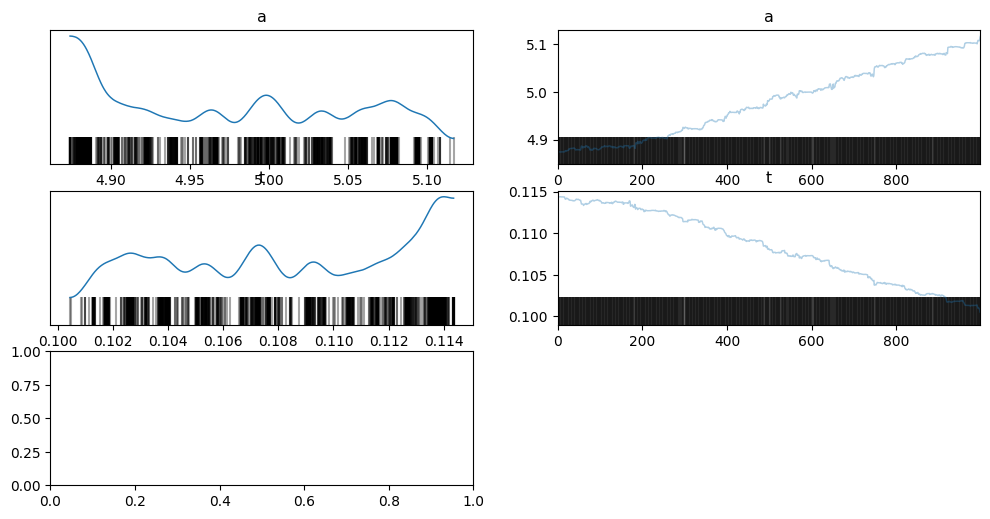

In [9]:
az.plot_trace(ddm_model_default.traces)
plt.tight_layout()

In [ ]:
ddm_model_default.traces

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ddm_model_default.traces.warmup_sample_stats["lp"].sel(chain=0))
plt.plot(ddm_model_default.traces.warmup_sample_stats["lp"].sel(chain=1))

In [ ]:
ddm_model_default.sample(cores=1, random_seed=1001, tune=500, draws=500)

In [ ]:
az.plot_trace(ddm_model_default.traces)

In [ ]:
import pymc as pm

ddm_model_default.sample(step=pm.Slice(model=ddm_model_default.pymc_model))

In [ ]:
az.plot_trace(ddm_model_default.traces)

In [ ]:
ddm_model_default.traces.sample_stats.mean(dim="draw")

In [ ]:
ddm_lan_model = hssm.HSSM(
    data=ddm_data,
    loglik_kind="approx_differentiable",
    t=bmb.Prior("Uniform", lower=0, upper=3.0, initval=0.6),
)
ddm_lan_model

In [ ]:
ddm_lan_model.sample(cores=1)

In [ ]:
az.plot_trace(ddm_lan_model.traces)

In [ ]:
from hssm.likelihoods import logp_ddm

In [ ]:
import numpy as np

np.save("error.npz", logp_ddm(ddm_data, 0.5, 1.5, 0.5, 0.5).eval())

In [ ]:
output = np.load("error.npz.npy")
output

In [ ]:
output1 = logp_ddm(ddm_data, 0.5, 1.5, 0.5, 0.5, err=).eval()

In [ ]:
np.max(output1 - output)

<div class="admonition note">
  <p class="admonition-title">Note</p>
  <p>
    Note in the above output that lapse probability and lapse distributions are at default values.
  </p>
</div>

## Specifying lapse probability and distribution

It is easy to change the lapse probability and distribution. HSSM has added two arguments, `p_outlier` and `lapse` to allow the lapse probability and distribution to be specified.

The optional `p_outlier` accepts a `float`, a `dict`, or a `bmb.Prior` object. When `p_outlier` is specified as a single `float` value, it will be considered "fixed". You can also specify a prior distribution for `p_outlier` through a `dict` or a `bmb.Prior` object, the same way as you would when specifying priors for any other parameter. That way, the lapse probability will be considered another parameter and will be estimated during MCMC sampling.

Likewise, the `lapse` argument accepts a `dict` or a `bmb.Prior` object to specify a fixed lapse distribution. This distribution will be considered as the one that outliers are generated from.

In [ ]:
ddm_model_lapse = hssm.HSSM(
    data=ddm_data,
    p_outlier={"name": "Uniform", "lower": 0.01, "upper": 0.5},
    lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
)

ddm_model_lapse

In [ ]:
lapse_trace = ddm_model_lapse.sample()
lapse_trace

In [ ]:
az.summary(lapse_trace)

In [ ]:
az.plot_trace(lapse_trace)
plt.tight_layout()

## Disable lapse probabilities and distributions

When both `p_outliers` and `lapse` are set to None, lapse probability and distributions will be ignored. They will not be included in the model output. This is different from setting `p_outlier=0`, where it is essentially still included in the likelihood computation.

<div class="admonition note">
  <p class="admonition-title">Note</p>
  <p>
    If only one of `p_outlier` and `lapse` is set to None, a `ValueError` will be raised. Please remember to set both of them to `None`.
  </p>
</div>

In [ ]:
ddm_model_no_lapse = hssm.HSSM(data=ddm_data, p_outlier=None, lapse=None)
ddm_model_no_lapse